 # Module 5: Supervised Machine Learning and Predictive Modeling 
 
 ## Lab 1: Predictive Modelling with Decision Tree 
 

## Objective

***

* Decision Tree Classification
* Entropy and Information Gain
* Gini Impurity
* Decision Tree Regression



## Decision Tree Classification
***

Here we will use iris dataset which has following characteristics: 

* Number of Instances: 150 (50 in each of three classes) 
* Number of Attributes: 4 
* Missing Attribute Values: None 
* Attribute Information:  
* sepal length in cm 
* sepal width in cm 
* petal length in cm 
* petal width in cm 
* class: 
  * Iris Setosa 
  * Iris Versicolour
  * Iris Virginica 


Creator: R.A. Fisher 
Date: July, 1988 
This is a copy of the test set of the UCI ML iris datasets 

https://archive.ics.uci.edu/ml/datasets/iris 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Firstly, let's import all the libraries and dataset. 

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
features = pd.DataFrame(iris.data)
labels = pd.DataFrame(iris.target)

In [2]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

Then, we split the dataset in 60/40 ratio into training and testing set respectively. 

In [3]:
#Train Test split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.5,random_state=332)#,random_state=0
print(features.shape)
print(labels.shape)

(150, 4)
(150, 1)


In [4]:
print(features)
print(labels)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
     0
0    0
1    0
2    0
3    0
4    0
..  ..
145  2
146  2
147  2
148  2
149  2

[150 rows x 1 columns]


In [5]:
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Next, fit the Decision Tree Classifier model to the training dataset. 

In [6]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print(pred)

[2 0 1 1 0 2 2 1 1 0 0 0 1 1 2 1 2 1 2 0 2 1 1 2 2 1 1 1 0 1 2 0 1 1 0 2 2
 1 2 2 0 2 2 0 0 2 0 1 1 0 2 2 1 2 1 2 1 2 2 2 2 1 0 0 0 1 0 0 2 0 0 0 1 1
 1]


Now find the accuracy with accuracy_score(). 

In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels_test, pred)
print(accuracy)
print(f"Akurasi:{accuracy*100}%")

0.9333333333333333
Akurasi:93.33333333333333%


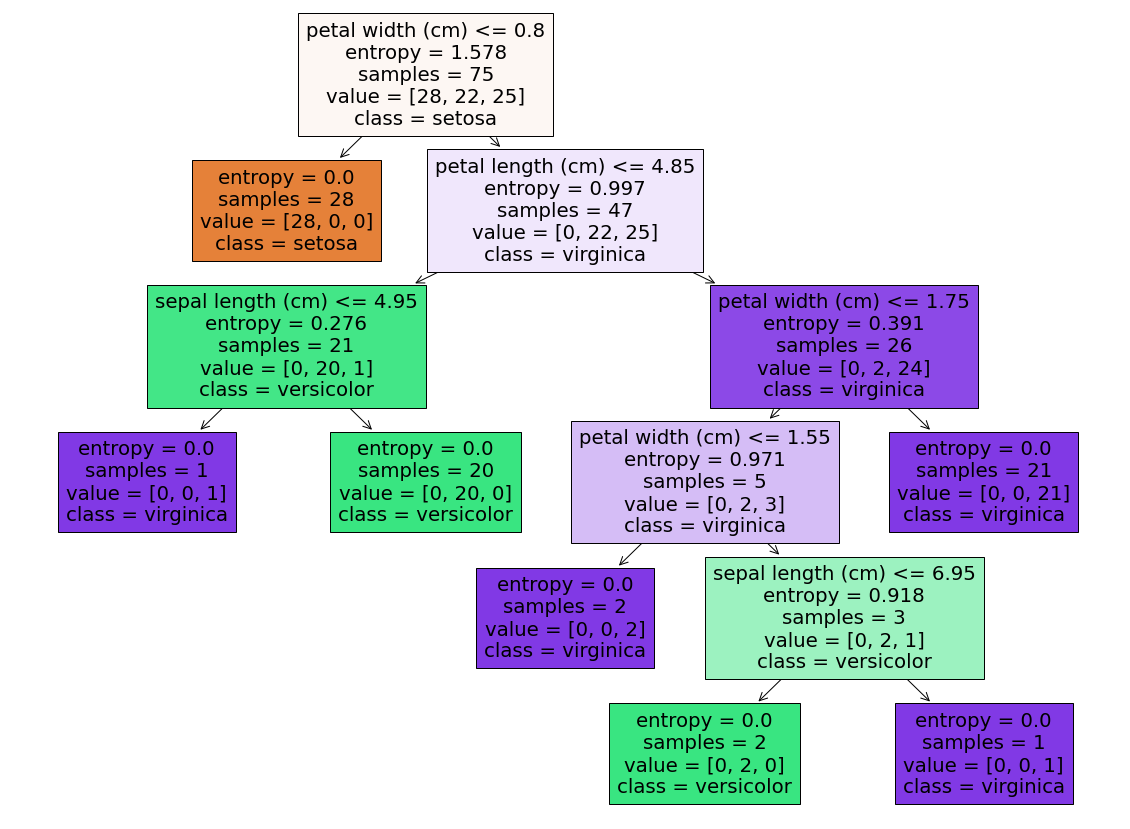

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20,15))
tree.plot_tree(clf, feature_names=iris.feature_names,  class_names=iris.target_names, filled=True)
plt.show()

## Entropy and Information Gain
***

**Entropy**: It is used to measure the impurity or randomness of a dataset. Imagine choosing a yellow ball from a box of just yellow balls (say 100 yellow balls). Then this box is said to have 0 entropy which implies 0 impurity or total purity. 

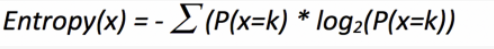

**Information Gain:** To find the best feature which serves as a root node in terms of information gain, we first use each descriptive feature and split the dataset along the values of these descriptive features and then calculate the entropy of the dataset.  

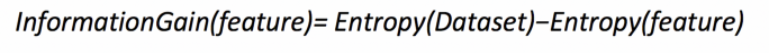

* The feature with the largest information gain should be used as the root node to start building the decision tree. 

ID3 algorithm uses information gain for constructing the decision tree. 

 

## Gini Impurity
***

**Gini Index:** It is calculated by subtracting the sum of squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values. 

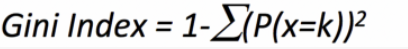

* A feature with a lower Gini index is chosen for a split.

The classic CART algorithm uses the Gini Index for constructing the decision tree. 

## Decision Tree Regression
***

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values. 

 

Import all the libraries and declare dataset. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

In [11]:
X = dataset[:, 1:2].astype(int) 
y = dataset[:, 2].astype(int) 

Now use the DecisionTreeRegressor and make a model to fit the algorithm. 

In [12]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

Now we find the predicted values by testing the model and visualise. 

In [14]:
y_pred = regressor.predict([[3750]])
print("Predicted price: % d\n"% y_pred) 

Predicted price:  8000



In [ ]:
x = int(input())
result = regressor.predict([[x]])
print(f"Predicted Price: {result[0]}")


In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)

X_grid = X_grid.reshape((len(X_grid), 1))

# scatter plot for original data
plt.scatter(X, y, color = 'red')

# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)')

# specify X axis label
plt.xlabel('Production Cost')

# specify Y axis label
plt.ylabel('Profit')

# show the plot
plt.show()


Using matplotlib to draw the decision tree regression. 

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(regressor, feature_names=X,  class_names=y, filled=True)
plt.show()

### Thank You !
